In [14]:
# General
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [15]:
feature = pd.read_csv(r'C:\Users\daffa\OneDrive - UGM 365\Keperluan Lomba\ICONIC\Iconic_2024\Dataset\Ekonomi\Credit_card.csv') 
label = pd.read_csv(r'C:\Users\daffa\OneDrive - UGM 365\Keperluan Lomba\ICONIC\Iconic_2024\Dataset\Ekonomi\Credit_card_label.csv')

In [16]:
# Gabungkan data feature dengan label dengan Ind_ID
data = pd.merge(feature, label, on='Ind_ID')
data

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [17]:
# Menghapus kolom Ind_ID
data = data.drop(columns=['Ind_ID'])

In [5]:
# import numpy as np
# import pandas as pd
# from sklearn.compose import ColumnTransformer
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
# from sklearn.model_selection import train_test_split
# from imblearn.combine import SMOTETomek
# from sklearn.metrics import classification_report, accuracy_score
# from imblearn.over_sampling import ADASYN
# from imblearn.under_sampling import TomekLinks

# # Ensure 'Years_Employed' is added correctly
# data['Years_Employed'] = data['Employed_days'] // 365

# # Create new features
# data['Income_per_Family_Member'] = data['Annual_income'] / data['Family_Members']
# data['Children_per_Family_Member'] = data['CHILDREN'] / data['Family_Members']
# data['Is_Employed'] = data['Employed_days'] > 0
# data['Age_Group'] = pd.cut(data['Birthday_count'], bins=[-np.inf, 365*18, 365*30, 365*50, 365*65, np.inf], labels=['<18', '18-30', '30-50', '50-65', '65+'])

# # Convert new categorical features to object type
# data['Is_Employed'] = data['Is_Employed'].astype('category')
# data['Age_Group'] = data['Age_Group'].astype('category')

# # Assuming data is your DataFrame and it has a 'label' column for the target variable
# X = data.drop(columns='label')
# y = data['label']

# # Update the feature lists
# numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
# categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# # Define the numeric transformer
# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())
# ])

# # Define the categorical transformer
# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# # Define the preprocessor with ColumnTransformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])

# # Set up oversampling with ADASYN
# oversampler = TomekLinks()

# # Create and apply pipeline
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor)
# ])

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # # Preprocess the data
# X_train_processed = pipeline.fit_transform(X_train)
# X_test_processed = pipeline.transform(X_test)

# # # Oversampling
# X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_processed, y_train)

In [18]:
# Prepo 2
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import FunctionTransformer

# Model
from imblearn.over_sampling import ADASYN
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, make_scorer, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [20]:
#Import ADASYN
from imblearn.over_sampling import ADASYN

# Ensure 'Years_Employed' is added correctly
data['Years_Employed'] = data['Employed_days'] // 365

# Ensure that Birthday_count is positive
data['Birthday_count'] = data['Birthday_count'].abs()

# Create new features
data['Income_per_Family_Member'] = data['Annual_income'] / data['Family_Members']
data['Children_per_Family_Member'] = data['CHILDREN'] / data['Family_Members']
data['Is_Employed'] = data['Employed_days'] > 0

# Assuming data is your DataFrame and it has a 'label' column for the target variable
X = data.drop(columns='label')
y = data['label']

# Convert y to an integer or categorical type if needed
if y.dtype == 'object':
    y = y.astype('category').cat.codes
elif y.dtype == 'float':
    y = y.astype(int)

# Update the feature lists
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Define the numeric transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define the categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the preprocessor with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Set up oversampling with ADASYN
oversampler = ADASYN(random_state=42)

# Create and apply pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Oversampling
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_processed, y_train)

# Get the feature names after one-hot encoding and other preprocessing
feature_names = list(preprocessor.named_transformers_['num'].get_feature_names_out(numeric_features)) + \
                list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))

# Convert the resampled data into a DataFrame
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=feature_names)

# Convert y_train_resampled into a Series and add it to the DataFrame
y_train_resampled_df = pd.Series(y_train_resampled, name='label')

# Concatenate the features and target into a single DataFrame
resampled_df = pd.concat([X_train_resampled_df, y_train_resampled_df], axis=1)

Epoch 1/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5853 - loss: 0.6989 - val_accuracy: 0.0138 - val_loss: 0.9423
Epoch 2/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6248 - loss: 0.6499 - val_accuracy: 0.0229 - val_loss: 0.9499
Epoch 3/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6470 - loss: 0.6314 - val_accuracy: 0.0275 - val_loss: 0.9596
Epoch 4/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6462 - loss: 0.6311 - val_accuracy: 0.0642 - val_loss: 0.9580
Epoch 5/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6557 - loss: 0.6100 - val_accuracy: 0.0917 - val_loss: 0.9612
Epoch 6/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6594 - loss: 0.5911 - val_accuracy: 0.1766 - val_loss: 0.9620
Epoch 7/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7120 - loss: 0.5594 - val_accuracy: 0.3050 - val_loss: 0.8871
Epoch 8/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7288 - loss: 0.5282 - val_accuracy: 0.3188 - 

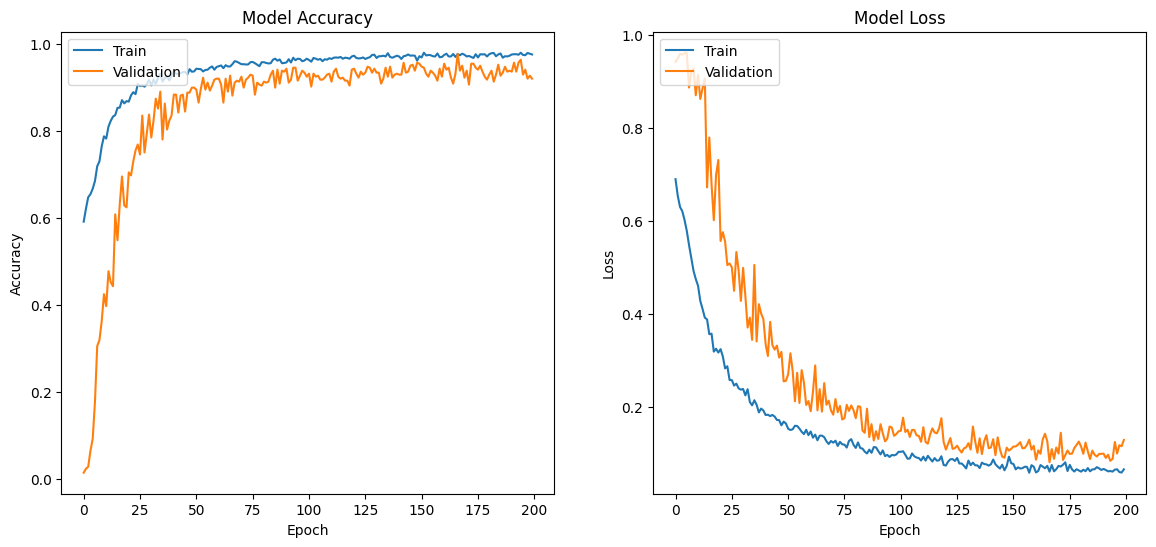

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       280
           1       0.60      0.30      0.40        30

    accuracy                           0.91       310
   macro avg       0.76      0.64      0.68       310
weighted avg       0.90      0.91      0.90       310

Accuracy Score: 0.9129032258064517


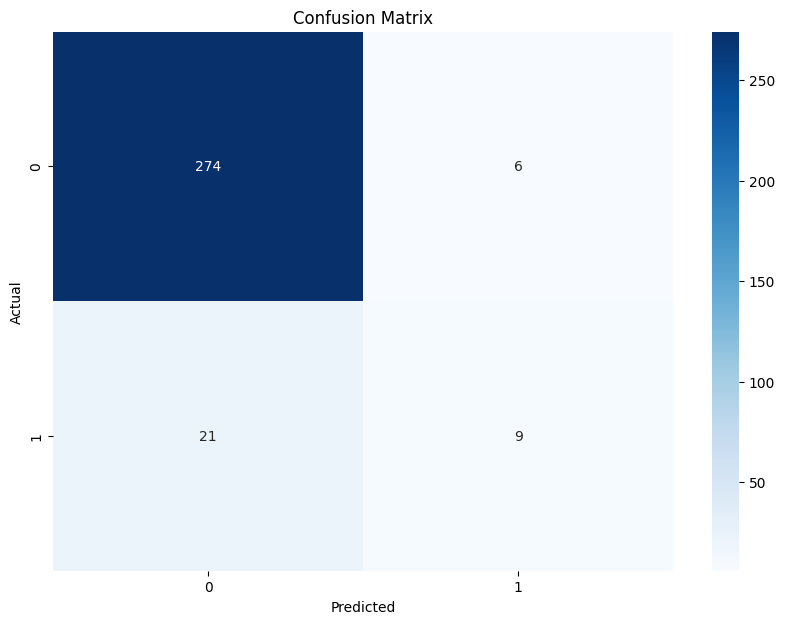

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the neural network model
model = Sequential([
    Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'),
    Dropout(0.3),  # Dropout for regularization
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, epochs=200, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_processed)
y_pred = (y_pred_probs > 0.5).astype(int)

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Epoch 1/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.5533 - loss: 0.6815 - val_accuracy: 0.0000e+00 - val_loss: 0.8962
Epoch 2/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6274 - loss: 0.6507 - val_accuracy: 0.0000e+00 - val_loss: 0.9410
Epoch 3/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6320 - loss: 0.6446 - val_accuracy: 0.0000e+00 - val_loss: 0.9051
Epoch 4/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6261 - loss: 0.6218 - val_accuracy: 0.0183 - val_loss: 0.9352
Epoch 5/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6302 - loss: 0.6051 - val_accuracy: 0.2064 - val_loss: 0.8160
Epoch 6/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6929 - loss: 0.5652 - val_accuracy: 0.3830 - val_loss: 0.8978
Epoch 7/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7252 - loss: 0.5254 - val_accuracy: 0.6032 - val_loss: 0.7997
Epoch 8/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7960 - loss: 0.4527 - val_accurac

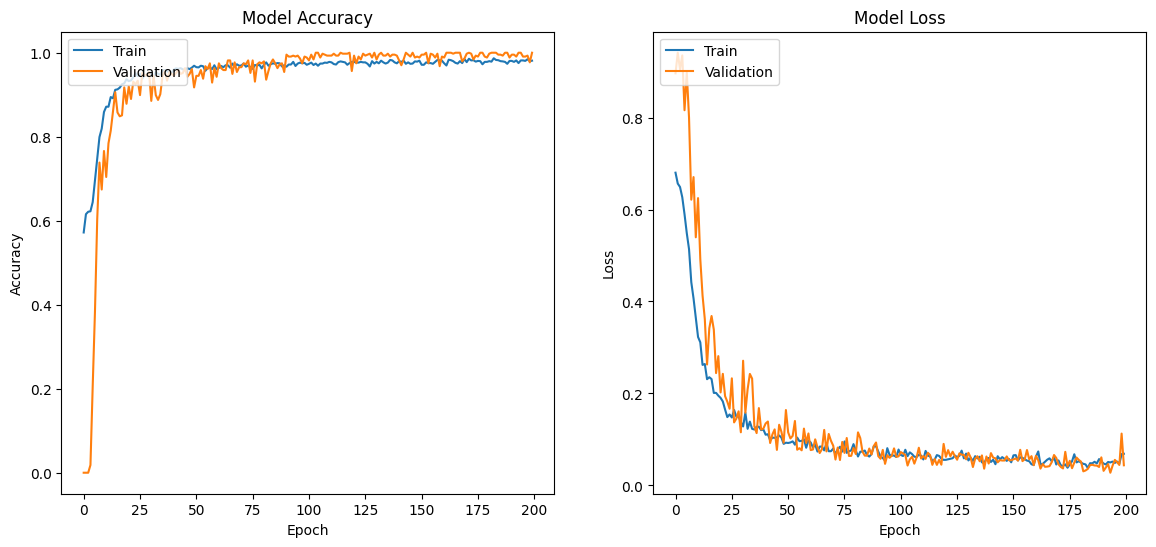

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       280
           1       0.50      0.47      0.48        30

    accuracy                           0.90       310
   macro avg       0.72      0.71      0.71       310
weighted avg       0.90      0.90      0.90       310

Accuracy Score: 0.9032258064516129


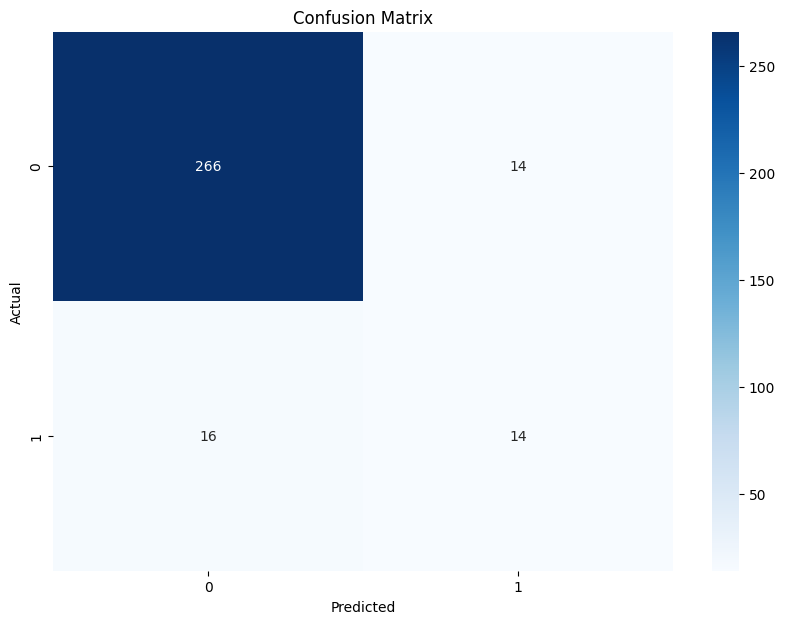

In [22]:

# Define the neural network model with more layers
model = Sequential([
    Dense(128, input_dim=X_train_resampled.shape[1], activation='relu'),
    Dropout(0.3),  # Dropout for regularization
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, epochs=200, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_processed)
y_pred = (y_pred_probs > 0.5).astype(int)

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [24]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_resampled), y=y_train_resampled)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}


In [25]:
# Define the neural network model with class weights
model = Sequential([
    Dense(128, input_dim=X_train_resampled.shape[1], activation='relu'),
    Dropout(0.3),  # Dropout for regularization
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with class weights
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with class weights
history = model.fit(X_train_resampled, y_train_resampled, epochs=200, batch_size=32, validation_split=0.2, verbose=1, class_weight=class_weights_dict)


Epoch 1/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5485 - loss: 0.6875 - val_accuracy: 0.0000e+00 - val_loss: 0.8817
Epoch 2/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6210 - loss: 0.6510 - val_accuracy: 0.0000e+00 - val_loss: 0.9103
Epoch 3/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6231 - loss: 0.6444 - val_accuracy: 0.0321 - val_loss: 0.9090
Epoch 4/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6099 - loss: 0.6317 - val_accuracy: 0.1170 - val_loss: 0.9135
Epoch 5/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6638 - loss: 0.5950 - val_accuracy: 0.2982 - val_loss: 0.9162
Epoch 6/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6901 - loss: 0.5845 - val_accuracy: 0.4243 - val_loss: 0.9018
Epoch 7/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7244 - loss: 0.5439 - val_accuracy: 0.5115 - val_loss: 0.8568
Epoch 8/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7524 - loss: 0.5056 - val_accuracy: 0

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       280
           1       0.38      0.47      0.42        30

    accuracy                           0.87       310
   macro avg       0.66      0.69      0.67       310
weighted avg       0.89      0.87      0.88       310



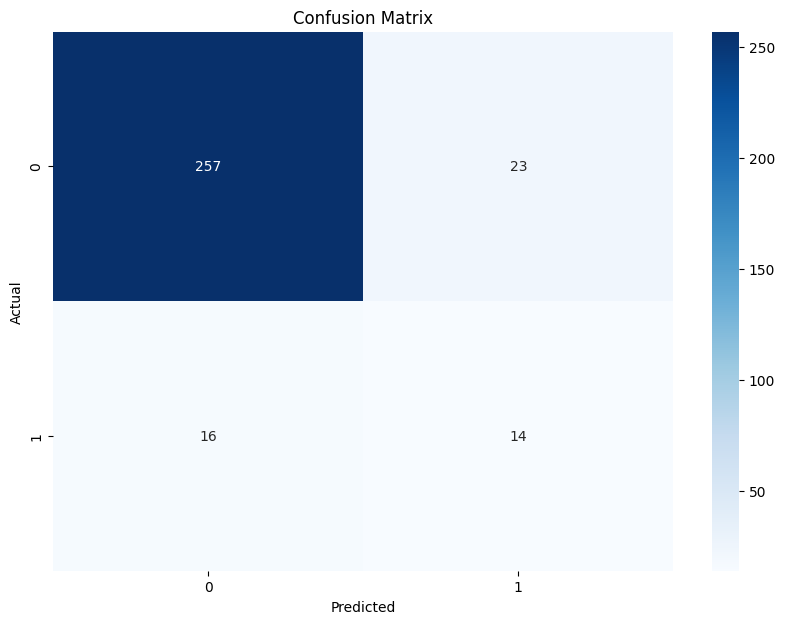

In [26]:
# Predict probabilities
y_pred_probs = model.predict(X_test_processed)

# Adjust the threshold
threshold = 0.05  # Lowering threshold from 0.5 to 0.3
y_pred = (y_pred_probs > threshold).astype(int)

# Evaluate the new predictions
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Epoch 1/300
31/31 [==============================] - 3s 15ms/step - loss: 0.6980 - accuracy: 0.3924 - val_loss: 0.6650 - val_accuracy: 0.7469
Epoch 2/300
31/31 [==============================] - 0s 7ms/step - loss: 0.6885 - accuracy: 0.5451 - val_loss: 0.6647 - val_accuracy: 0.7592
Epoch 3/300
31/31 [==============================] - 0s 7ms/step - loss: 0.6853 - accuracy: 0.5348 - val_loss: 0.6363 - val_accuracy: 0.7673
Epoch 4/300
31/31 [==============================] - 0s 7ms/step - loss: 0.6829 - accuracy: 0.6014 - val_loss: 0.6470 - val_accuracy: 0.7714
Epoch 5/300
31/31 [==============================] - 0s 7ms/step - loss: 0.6785 - accuracy: 0.5533 - val_loss: 0.6363 - val_accuracy: 0.7633
Epoch 6/300
31/31 [==============================] - 0s 7ms/step - loss: 0.6755 - accuracy: 0.6475 - val_loss: 0.6382 - val_accuracy: 0.7265
Epoch 7/300
31/31 [==============================] - 0s 7ms/step - loss: 0.6675 - accuracy: 0.5553 - val_loss: 0.6138 - val_accuracy: 0.7592
Epoch 8/300


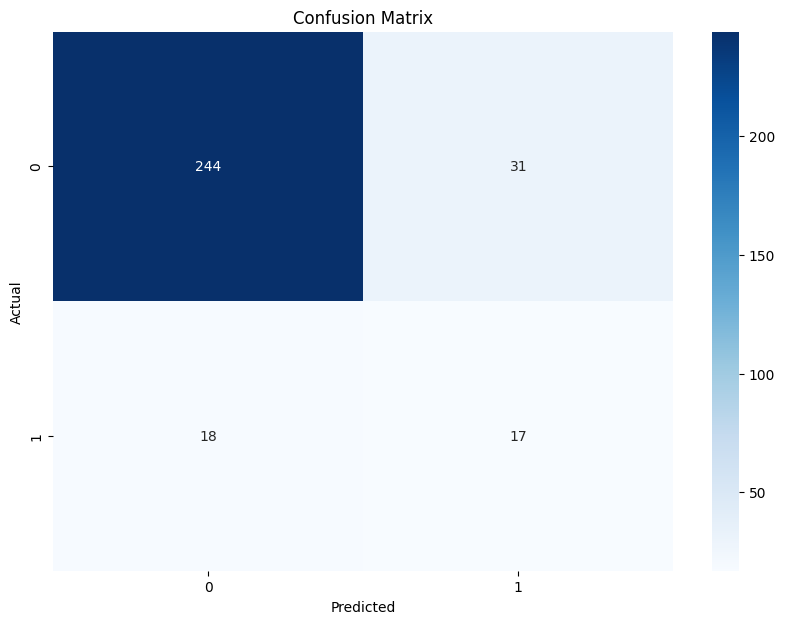

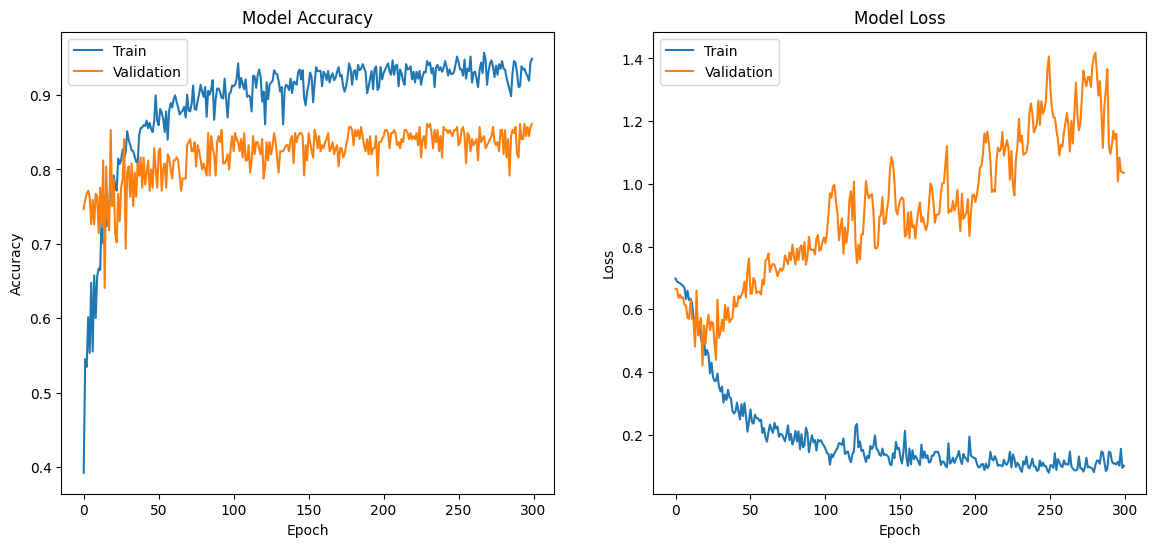

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU

# Define the neural network model with more layers and varied activation functions
model = Sequential([
    Dense(256, input_dim=X_train_resampled.shape[1]),  # First layer
    LeakyReLU(alpha=0.1),  # LeakyReLU activation function
    Dropout(0.3),
    
    Dense(128),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),
    
    Dense(64, activation='tanh'),  # Tanh activation function
    Dropout(0.3),
    
    Dense(32, activation='relu'),  # ReLU activation function
    Dropout(0.2),
    
    Dense(16, activation='relu'),
    Dropout(0.2),
    
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with class weights
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with class weights
history = model.fit(X_train_resampled, y_train_resampled, epochs=300, batch_size=32, validation_split=0.2, verbose=1, class_weight=class_weights_dict)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_processed)

# Adjust the threshold
threshold = 0.05  # Fine-tune this threshold based on performance
y_pred = (y_pred_probs > threshold).astype(int)

# Evaluate the new predictions
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU

# Define the neural network model with more layers and varied activation functions
model = Sequential([
    Dense(256, input_dim=X_train_resampled.shape[1]),  # First layer
    LeakyReLU(alpha=0.1),  # LeakyReLU activation function
    Dropout(0.3),
    
    Dense(128),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),
    
    Dense(64, activation='tanh'),  # Tanh activation function
    Dropout(0.3),
    
    Dense(32, activation='relu'),  # ReLU activation function
    Dropout(0.2),
    
    Dense(16, activation='relu'),
    Dropout(0.2),
    
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with class weights
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with class weights
history = model.fit(X_train_resampled, y_train_resampled, epochs=200, batch_size=32, validation_split=0.2, verbose=1, class_weight=class_weights_dict)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_processed)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Calculate specificity (1 - false positive rate)
specificity = 1 - fpr

# Calculate geometric mean for each threshold
gmeans = np.sqrt(tpr * specificity)

# Find the optimal threshold
optimal_idx = np.argmax(gmeans)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold based on Geometric Mean: {optimal_threshold}")

# Make predictions based on the optimal threshold
y_pred = (y_pred_probs >= optimal_threshold).astype(int)

# Evaluate the new predictions
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot the ROC curve with the optimal point marked
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label='ROC curve')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


NameError: name 'class_weights_dict' is not defined

Epoch 1/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.5802 - loss: 0.6821 - val_accuracy: 0.0023 - val_loss: 0.8820
Epoch 2/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6308 - loss: 0.6450 - val_accuracy: 0.0321 - val_loss: 0.8997
Epoch 3/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6279 - loss: 0.6193 - val_accuracy: 0.3463 - val_loss: 0.8423
Epoch 4/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6712 - loss: 0.5675 - val_accuracy: 0.6491 - val_loss: 0.6951
Epoch 5/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7663 - loss: 0.4836 - val_accuracy: 0.5826 - val_loss: 0.7216
Epoch 6/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8317 - loss: 0.4086 - val_accuracy: 0.8280 - val_loss: 0.4498
Epoch 7/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8331 - loss: 0.3838 - val_accuracy: 0.7339 - val_loss: 0.5750
Epoch 8/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8550 - loss: 0.3493 - val_accuracy: 0.8073 - 

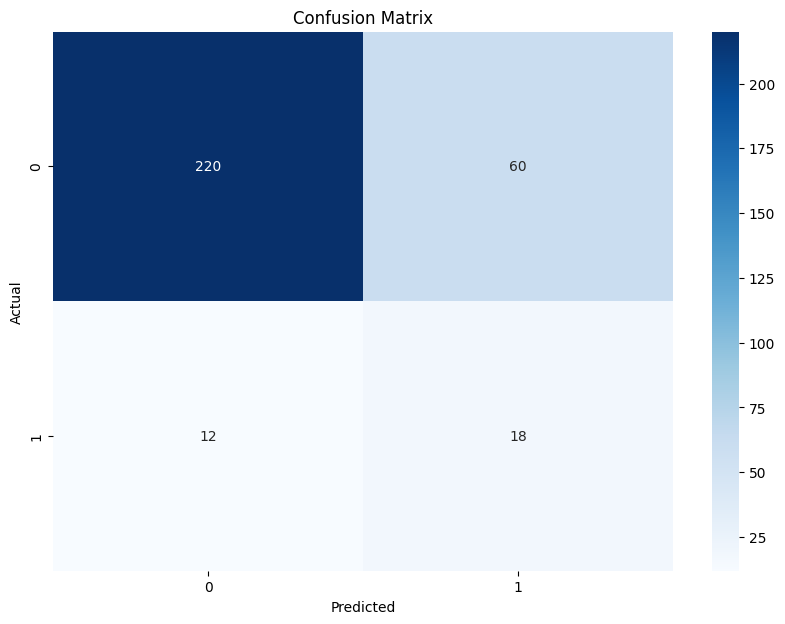

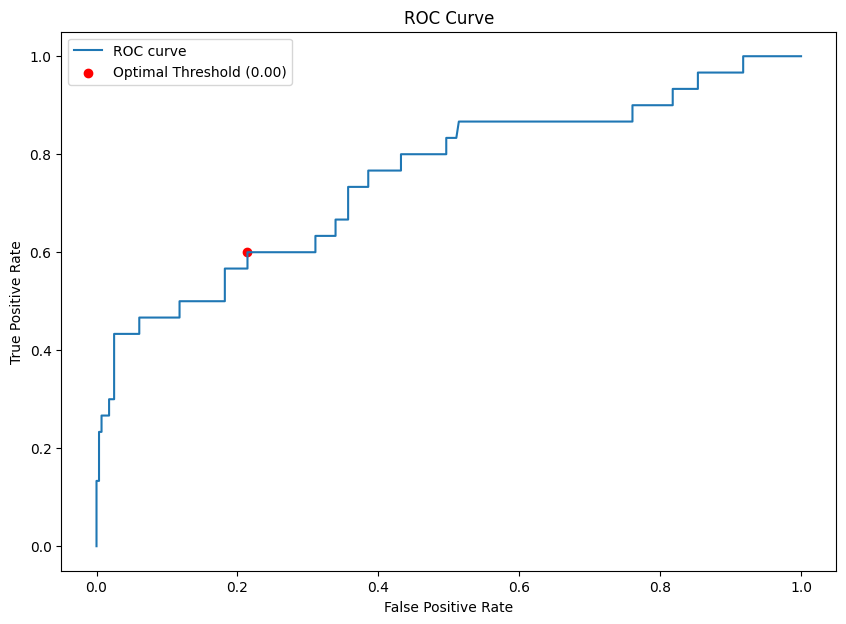

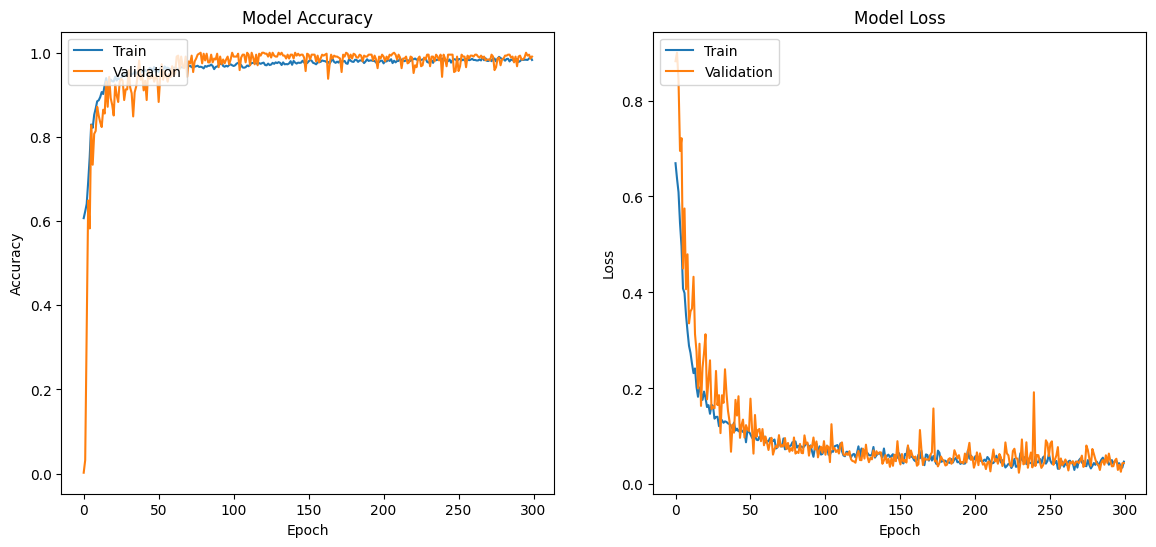

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU

# Define the neural network model with more layers and varied activation functions
model = Sequential([
    Dense(256, input_dim=X_train_resampled.shape[1]),  # First layer
    LeakyReLU(alpha=0.1),  # LeakyReLU activation function
    Dropout(0.3),
    
    Dense(128),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),
    
    Dense(64, activation='tanh'),  # Tanh activation function
    Dropout(0.3),
    
    Dense(32, activation='relu'),  # ReLU activation function
    Dropout(0.2),
    
    Dense(16, activation='relu'),
    Dropout(0.2),
    
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with class weights
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with class weights
history = model.fit(X_train_resampled, y_train_resampled, epochs=300, batch_size=32, validation_split=0.2, verbose=1, class_weight=class_weights_dict)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_processed)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Calculate specificity (1 - false positive rate)
specificity = 1 - fpr

# Calculate geometric mean for each threshold
gmeans = np.sqrt(tpr * specificity)

# Find the optimal threshold
optimal_idx = np.argmax(gmeans)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold based on Geometric Mean: {optimal_threshold}")

# Make predictions based on the optimal threshold
y_pred = (y_pred_probs >= optimal_threshold).astype(int)

# Evaluate the new predictions
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot the ROC curve with the optimal point marked
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label='ROC curve')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
Classification Report for ANN:
              precision    recall  f1-score   support

           0      0.955     0.829     0.887       280
           1      0.284     0.633     0.392        30

    accuracy                          0.810       310
   macro avg      0.619     0.731     0.639       310
weighted avg      0.890     0.810     0.839       310



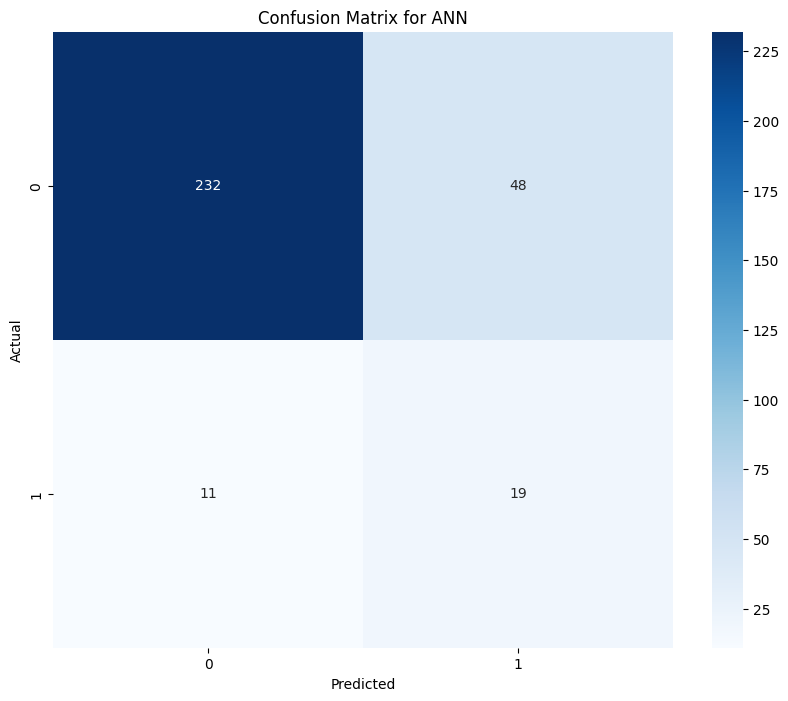

In [30]:
from tensorflow.keras.layers import LeakyReLU, BatchNormalization
# Assuming data is your DataFrame and it has a 'label' column for the target variable
X = data.drop('label', axis=1)
y = data['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'bool', 'category']).columns

# Define the preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create and apply the preprocessing pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Utility function for geometric mean
def geometric_mean(sensitivity, specificity):
    return np.sqrt(sensitivity * specificity)

# Oversample the training data using ADASYN
oversampler = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_processed, y_train)
def create_ann_model(input_dim):
    model = Sequential()
    
    # First hidden layer with Batch Normalization and LeakyReLU
    model.add(Dense(512, input_dim=input_dim))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.5))
    
    # Second hidden layer with Batch Normalization and LeakyReLU
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.5))
    
    # Third hidden layer with Batch Normalization and LeakyReLU
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.5))
    
    # Fourth hidden layer with ReLU
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    
    # Fifth hidden layer with ReLU
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.4))
    
    # Sixth hidden layer with ReLU
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.3))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate the ANN model
def evaluate_ann_model(X_train_resampled, y_train_resampled, X_test_processed, y_test):
    # Create and compile the ANN model
    model = create_ann_model(X_train_resampled.shape[1])
    
    # Train the model
    model.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size=32, verbose=0)

    # Get predicted probabilities for the positive class
    y_probs = model.predict(X_test_processed).flatten()

    # Calculate the ROC curve points
    fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=1)

    # Calculate specificity (1 - FPR)
    specificity = 1 - fpr

    # Calculate geometric mean for each threshold
    gmeans = [geometric_mean(tpr[i], specificity[i]) for i in range(len(tpr))]

    # Find the threshold that gives the best geometric mean
    optimal_idx = np.argmax(gmeans)
    optimal_threshold = thresholds[optimal_idx]

    # Make predictions using the optimal threshold
    y_pred = (y_probs >= optimal_threshold).astype(int)

    # Print classification report
    print(f"Classification Report for ANN:")
    print(classification_report(y_test, y_pred, digits=3))

    # Plot the confusion matrix heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for ANN')
    plt.show()

# Train and evaluate the ANN model with the enhanced architecture
evaluate_ann_model(X_train_resampled, y_train_resampled, X_test_processed, y_test)



10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step
Classification Report for ANN:
              precision    recall  f1-score   support

           0      0.951     0.839     0.892       280
           1      0.286     0.600     0.387        30

    accuracy                          0.816       310
   macro avg      0.619     0.720     0.639       310
weighted avg      0.887     0.816     0.843       310



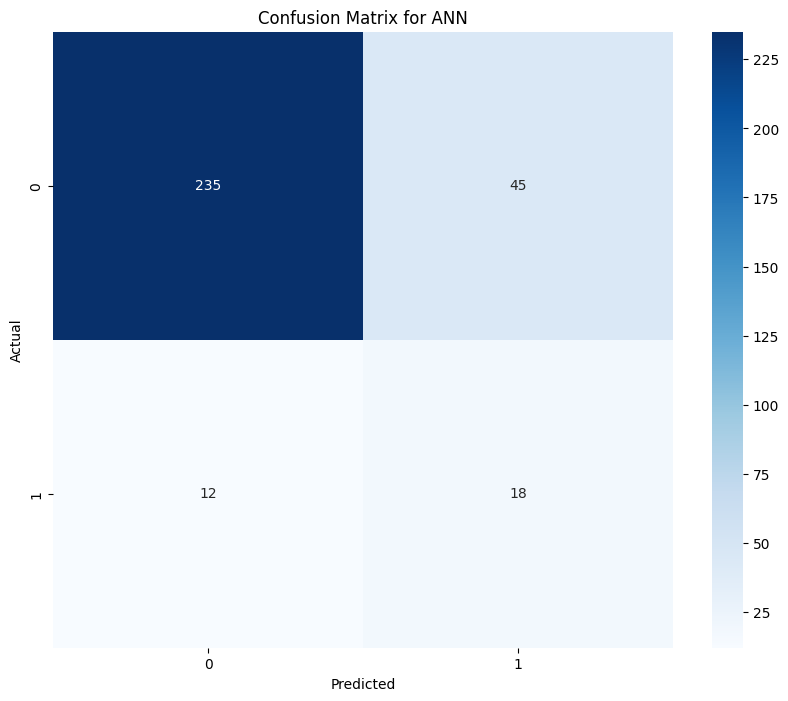

In [34]:
from tensorflow.keras.layers import LeakyReLU, BatchNormalization
# Assuming data is your DataFrame and it has a 'label' column for the target variable
X = data.drop('label', axis=1)
y = data['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'bool', 'category']).columns

# Define the preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create and apply the preprocessing pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Utility function for geometric mean
def geometric_mean(sensitivity, specificity):
    return np.sqrt(sensitivity * specificity)

# Oversample the training data using ADASYN
oversampler = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_processed, y_train)
def create_ann_model(input_dim):
    model = Sequential()
    
    # First hidden layer with Batch Normalization and LeakyReLU
    model.add(Dense(512, input_dim=input_dim))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.5))
    
    # Second hidden layer with Batch Normalization and LeakyReLU
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.5))
    
    # Third hidden layer with Batch Normalization and LeakyReLU
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.5))
    
    # Fourth hidden layer with ReLU
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    
    # Fifth hidden layer with ReLU
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.4))
    
    # Sixth hidden layer with ReLU
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.3))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate the ANN model
def evaluate_ann_model(X_train_resampled, y_train_resampled, X_test_processed, y_test):
    # Create and compile the ANN model
    model = create_ann_model(X_train_resampled.shape[1])
    
    # Train the model
    model.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size=32, verbose=0)

    # Get predicted probabilities for the positive class
    y_probs = model.predict(X_test_processed).flatten()

    # Calculate the ROC curve points
    fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=1)

    # Calculate specificity (1 - FPR)
    specificity = 1 - fpr

    # Calculate geometric mean for each threshold
    gmeans = [geometric_mean(tpr[i], specificity[i]) for i in range(len(tpr))]

    # Find the threshold that gives the best geometric mean
    optimal_idx = np.argmax(gmeans)
    optimal_threshold = thresholds[optimal_idx]

    # Make predictions using the optimal threshold
    y_pred = (y_probs >= optimal_threshold).astype(int)

    # Print classification report
    print(f"Classification Report for ANN:")
    print(classification_report(y_test, y_pred, digits=3))

    # Plot the confusion matrix heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for ANN')
    plt.show()

# Train and evaluate the ANN model with the enhanced architecture
evaluate_ann_model(X_train_resampled, y_train_resampled, X_test_processed, y_test)



Epoch 1/300
31/31 [==============================] - 5s 31ms/step - loss: 0.7304 - accuracy: 0.4898 - val_loss: 0.6689 - val_accuracy: 0.6789
Epoch 2/300
31/31 [==============================] - 0s 15ms/step - loss: 0.7126 - accuracy: 0.5276 - val_loss: 0.6657 - val_accuracy: 0.7317
Epoch 3/300
31/31 [==============================] - 1s 20ms/step - loss: 0.7270 - accuracy: 0.4541 - val_loss: 0.6841 - val_accuracy: 0.6545
Epoch 4/300
31/31 [==============================] - 1s 24ms/step - loss: 0.7128 - accuracy: 0.3949 - val_loss: 0.7294 - val_accuracy: 0.3333
Epoch 5/300
31/31 [==============================] - 1s 17ms/step - loss: 0.7144 - accuracy: 0.4010 - val_loss: 0.6732 - val_accuracy: 0.6789
Epoch 6/300
31/31 [==============================] - 0s 14ms/step - loss: 0.6905 - accuracy: 0.4806 - val_loss: 0.6925 - val_accuracy: 0.5203
Epoch 7/300
31/31 [==============================] - 0s 11ms/step - loss: 0.6983 - accuracy: 0.5694 - val_loss: 0.6444 - val_accuracy: 0.7236
Epoch 

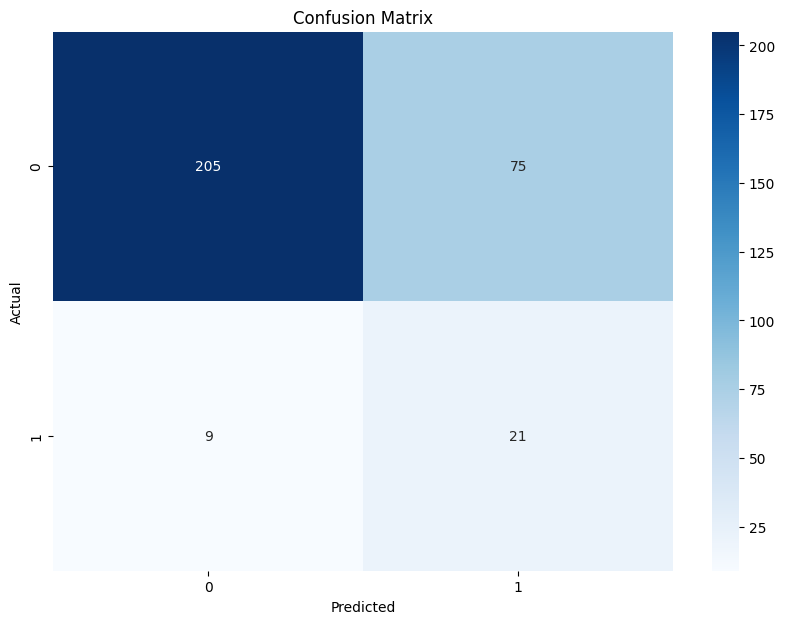

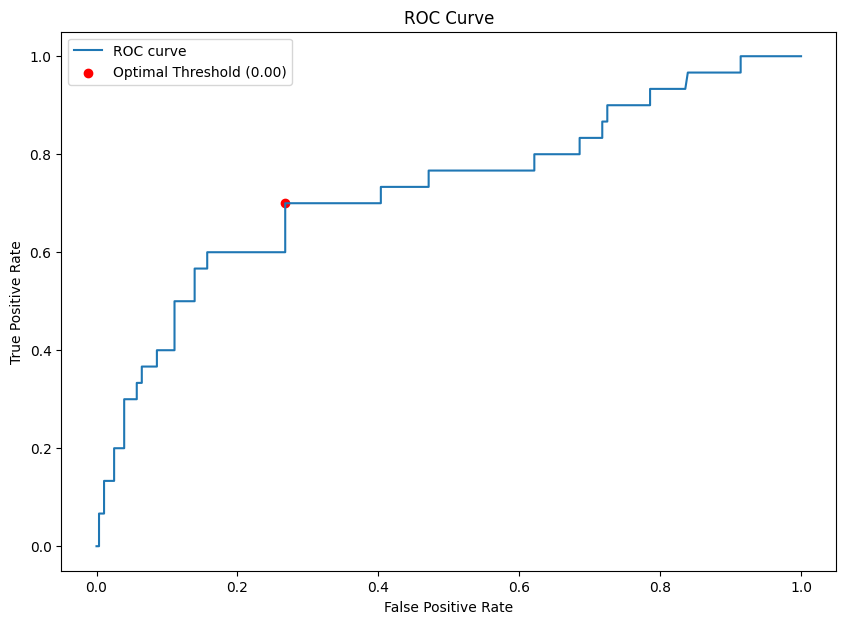

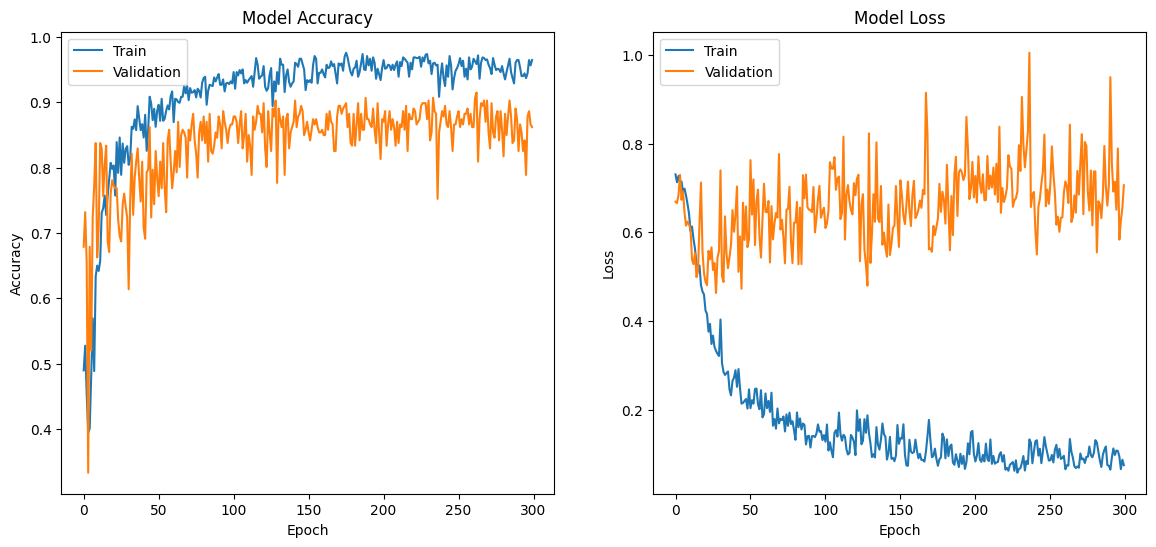

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU

# Define the neural network model with more layers and varied activation functions
model = Sequential([
    Dense(256, input_dim=X_train_resampled.shape[1]),  # First layer
    LeakyReLU(alpha=0.1),  # LeakyReLU activation function
    Dropout(0.3),
    
    Dense(128),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),
    
    Dense(64, activation='tanh'),  # Tanh activation function
    Dropout(0.3),
    
    Dense(32, activation='relu'),  # ReLU activation function
    Dropout(0.2),
    
    Dense(16, activation='relu'),
    Dropout(0.2),
    
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with class weights
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with class weights
history = model.fit(X_train_resampled, y_train_resampled, epochs=300, batch_size=32, validation_split=0.2, verbose=1, class_weight=class_weights_dict)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_processed)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Calculate specificity (1 - false positive rate)
specificity = 1 - fpr

# Calculate geometric mean for each threshold
gmeans = np.sqrt(tpr * specificity)

# Find the optimal threshold
optimal_idx = np.argmax(gmeans)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold based on Geometric Mean: {optimal_threshold}")

# Make predictions based on the optimal threshold
y_pred = (y_pred_probs >= optimal_threshold).astype(int)

# Evaluate the new predictions
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot the ROC curve with the optimal point marked
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label='ROC curve')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Epoch 1/300
31/31 [==============================] - 10s 47ms/step - loss: 0.7272 - accuracy: 0.4673 - val_loss: 0.6929 - val_accuracy: 0.4919
Epoch 2/300
31/31 [==============================] - 1s 25ms/step - loss: 0.7242 - accuracy: 0.4541 - val_loss: 0.6859 - val_accuracy: 0.7439
Epoch 3/300
31/31 [==============================] - 1s 26ms/step - loss: 0.7246 - accuracy: 0.5306 - val_loss: 0.6958 - val_accuracy: 0.4228
Epoch 4/300
31/31 [==============================] - 1s 25ms/step - loss: 0.7254 - accuracy: 0.4102 - val_loss: 0.7021 - val_accuracy: 0.5000
Epoch 5/300
31/31 [==============================] - 1s 32ms/step - loss: 0.7229 - accuracy: 0.4765 - val_loss: 0.6934 - val_accuracy: 0.6057
Epoch 6/300
31/31 [==============================] - 1s 20ms/step - loss: 0.7243 - accuracy: 0.3888 - val_loss: 0.7052 - val_accuracy: 0.3537
Epoch 7/300
31/31 [==============================] - 1s 23ms/step - loss: 0.7174 - accuracy: 0.3388 - val_loss: 0.7512 - val_accuracy: 0.1504
Epoch

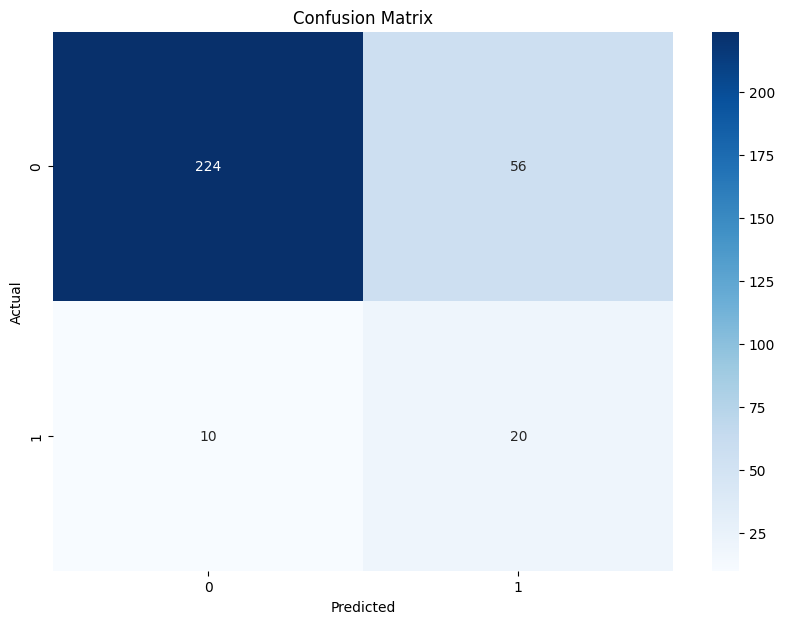

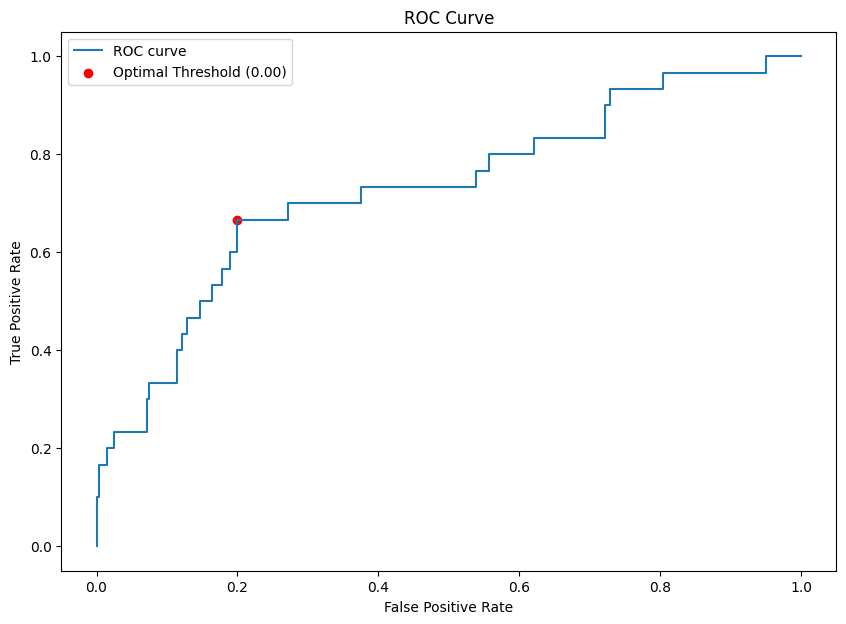

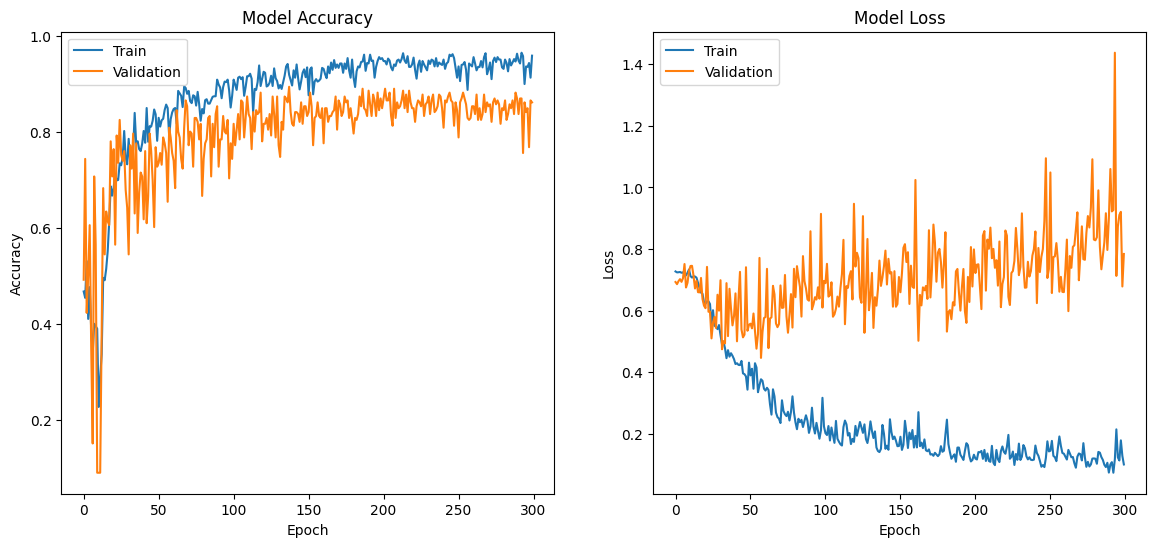

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU

# Define the neural network model with more layers and varied activation functions
model = Sequential([
    Dense(512, input_dim=X_train_resampled.shape[1]),  # First layer with more neurons
    LeakyReLU(alpha=0.1),
    Dropout(0.4),  # Increased dropout rate for regularization

    Dense(256),
    LeakyReLU(alpha=0.1),
    Dropout(0.4),

    Dense(128, activation='tanh'),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(16, activation='relu'),
    Dropout(0.2),

    Dense(8, activation='relu'),  # Additional layer
    Dropout(0.2),

    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with class weights
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with class weights
history = model.fit(X_train_resampled, y_train_resampled, epochs=300, batch_size=32, validation_split=0.2, verbose=1, class_weight=class_weights_dict)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_processed)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Calculate specificity (1 - false positive rate)
specificity = 1 - fpr

# Calculate geometric mean for each threshold
gmeans = np.sqrt(tpr * specificity)

# Find the optimal threshold
optimal_idx = np.argmax(gmeans)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold based on Geometric Mean: {optimal_threshold}")

# Make predictions based on the optimal threshold
y_pred = (y_pred_probs >= optimal_threshold).astype(int)

# Evaluate the new predictions
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot the ROC curve with the optimal point marked
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label='ROC curve')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Epoch 1/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 26ms/step - accuracy: 0.5494 - loss: 1.6231 - val_accuracy: 0.0000e+00 - val_loss: 1.6386 - learning_rate: 0.0010
Epoch 2/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5664 - loss: 1.5132 - val_accuracy: 0.0000e+00 - val_loss: 1.7476 - learning_rate: 0.0010
Epoch 3/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5634 - loss: 1.5047 - val_accuracy: 0.0000e+00 - val_loss: 1.7846 - learning_rate: 0.0010
Epoch 4/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5880 - loss: 1.4631 - val_accuracy: 0.1445 - val_loss: 1.7663 - learning_rate: 0.0010
Epoch 5/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6022 - loss: 1.4460 - val_accuracy: 0.0642 - val_loss: 1.7477 - learning_rate: 0.0010
Epoch 6/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6180 - loss: 1.4224 - val_accuracy: 0.0986 - val_loss: 1.7246 - learning_rate: 0.0010
Epoch 7/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6031 - lo

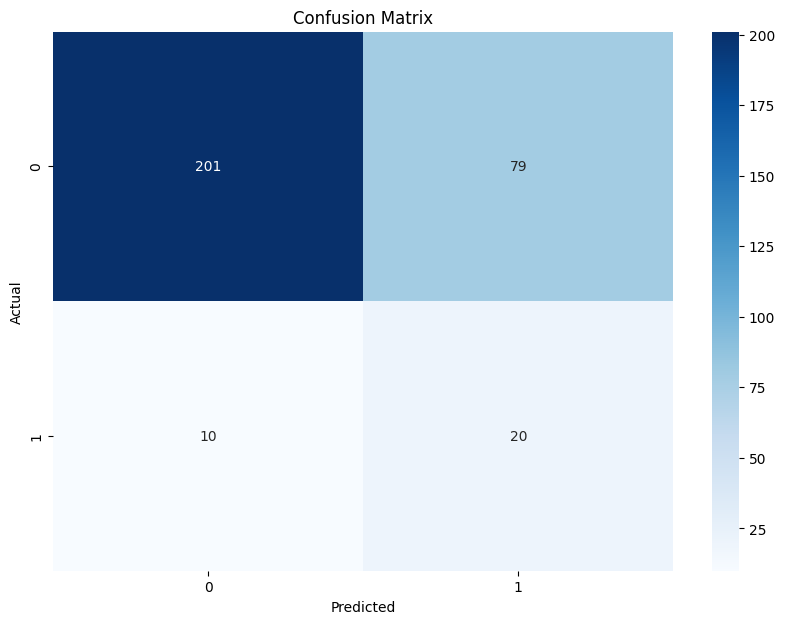

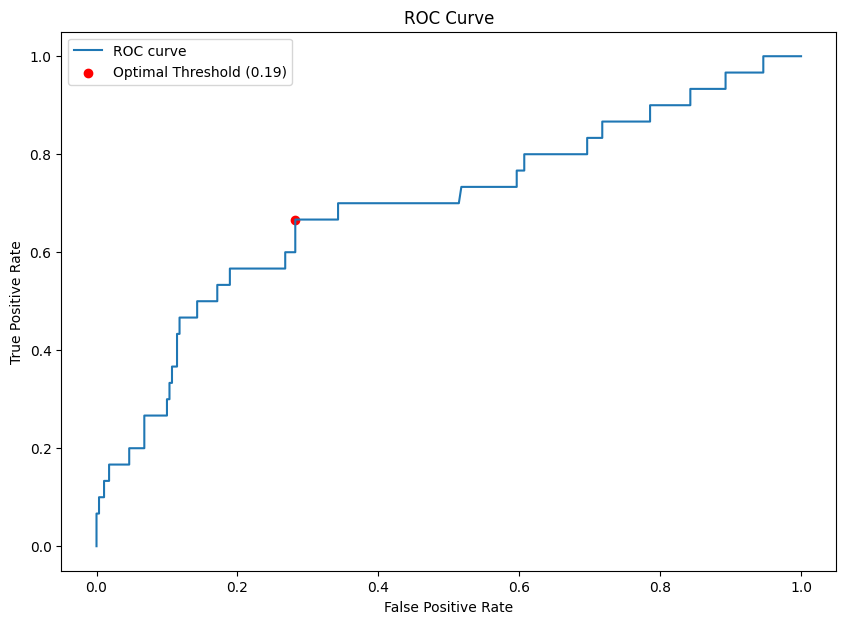

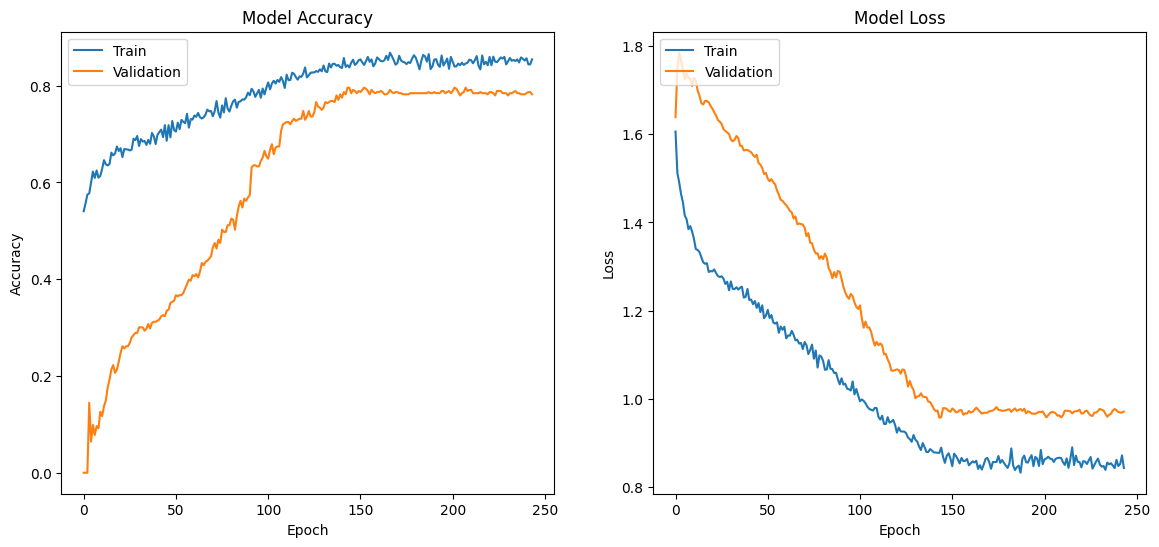

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Define the neural network model with optimizations
model = Sequential([
    Dense(512, input_dim=X_train_resampled.shape[1], kernel_regularizer=l2(0.001)),  # L2 regularization
    BatchNormalization(),  # Batch Normalization
    LeakyReLU(alpha=0.1),
    Dropout(0.4),

    Dense(256, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.4),

    Dense(128, activation='tanh', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(8, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with Adam optimizer and learning rate schedule
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model with class weights and callbacks
history = model.fit(
    X_train_resampled, y_train_resampled, 
    epochs=300, batch_size=32, 
    validation_split=0.2, 
    verbose=1, 
    class_weight=class_weights_dict,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_processed)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Calculate specificity (1 - false positive rate)
specificity = 1 - fpr

# Calculate geometric mean for each threshold
gmeans = np.sqrt(tpr * specificity)

# Find the optimal threshold
optimal_idx = np.argmax(gmeans)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold based on Geometric Mean: {optimal_threshold}")

# Make predictions based on the optimal threshold
y_pred = (y_pred_probs >= optimal_threshold).astype(int)

# Evaluate the new predictions
print("Classification Report:")
print(classification_report(y_test, y_pred,digits=4))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot the ROC curve with the optimal point marked
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label='ROC curve')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [12]:
   # Evaluate the new predictions
print("Classification Report:")
print(classification_report(y_test, y_pred,digits=3))

Classification Report:
              precision    recall  f1-score   support

           0      0.956     0.846     0.898       280
           1      0.306     0.633     0.413        30

    accuracy                          0.826       310
   macro avg      0.631     0.740     0.655       310
weighted avg      0.893     0.826     0.851       310



In [22]:
   # Evaluate the new predictions
print("Classification Report:")
print(classification_report(y_test, y_pred,digits=3))

Classification Report:
              precision    recall  f1-score   support

           0      0.959     0.582     0.724       280
           1      0.164     0.767     0.271        30

    accuracy                          0.600       310
   macro avg      0.562     0.674     0.498       310
weighted avg      0.882     0.600     0.681       310



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight

In [11]:
# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_resampled), y=y_train_resampled)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}


## 2 Layer

In [9]:
model_2_layers = Sequential([
    Dense(512, input_dim=X_train_resampled.shape[1], kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.4),

    Dense(256, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.4),

    Dense(1, activation='sigmoid')  # Output layer for binary classification
])


Epoch 1/300
55/55 [==============================] - 5s 17ms/step - loss: 1.1284 - accuracy: 0.6202 - val_loss: 1.2190 - val_accuracy: 0.2959 - lr: 0.0010
Epoch 2/300
55/55 [==============================] - 1s 11ms/step - loss: 0.9527 - accuracy: 0.7338 - val_loss: 0.9639 - val_accuracy: 0.7729 - lr: 0.0010
Epoch 3/300
55/55 [==============================] - 1s 13ms/step - loss: 0.8663 - accuracy: 0.7602 - val_loss: 0.8343 - val_accuracy: 0.8578 - lr: 0.0010
Epoch 4/300
55/55 [==============================] - 1s 17ms/step - loss: 0.7891 - accuracy: 0.7963 - val_loss: 0.7084 - val_accuracy: 0.9358 - lr: 0.0010
Epoch 5/300
55/55 [==============================] - 1s 15ms/step - loss: 0.7441 - accuracy: 0.8147 - val_loss: 0.6520 - val_accuracy: 0.9106 - lr: 0.0010
Epoch 6/300
55/55 [==============================] - 1s 13ms/step - loss: 0.6947 - accuracy: 0.8279 - val_loss: 0.6857 - val_accuracy: 0.8578 - lr: 0.0010
Epoch 7/300
55/55 [==============================] - 0s 9ms/step - los

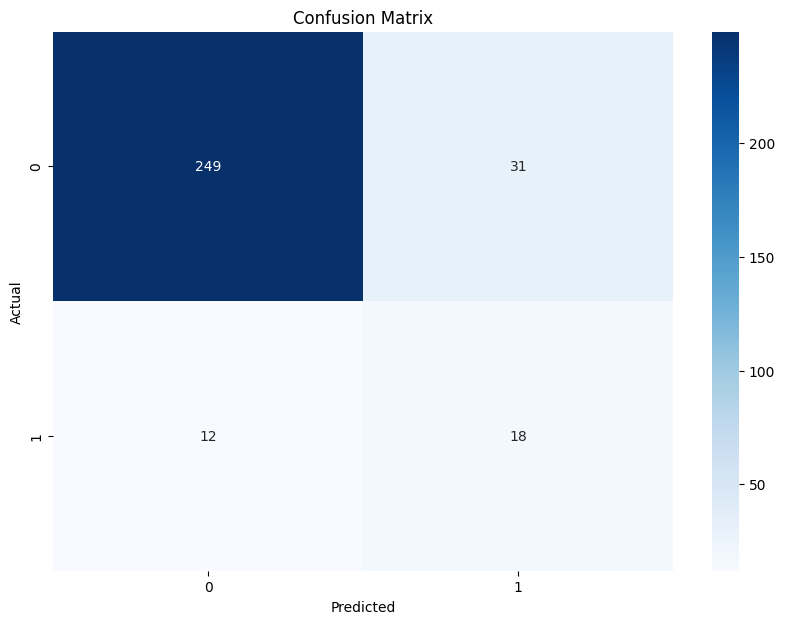

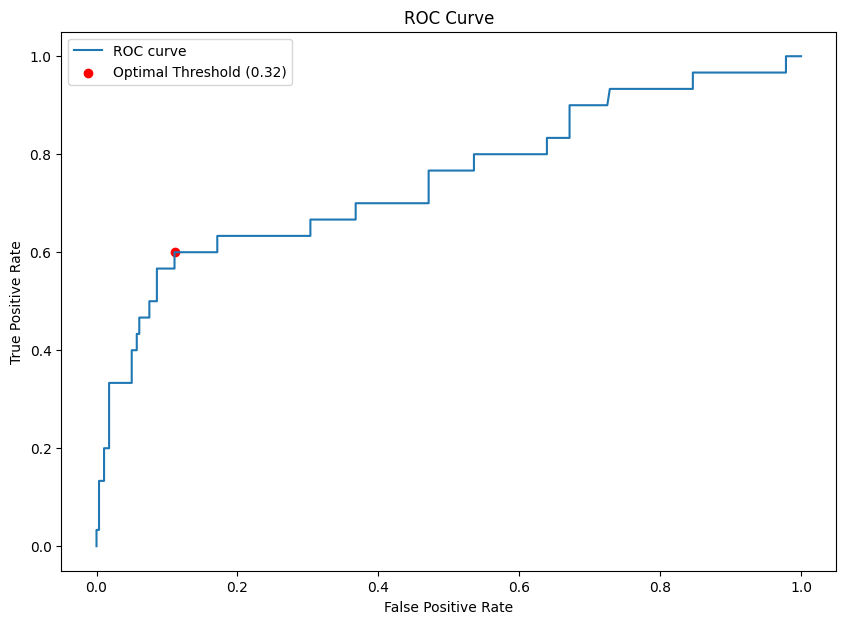

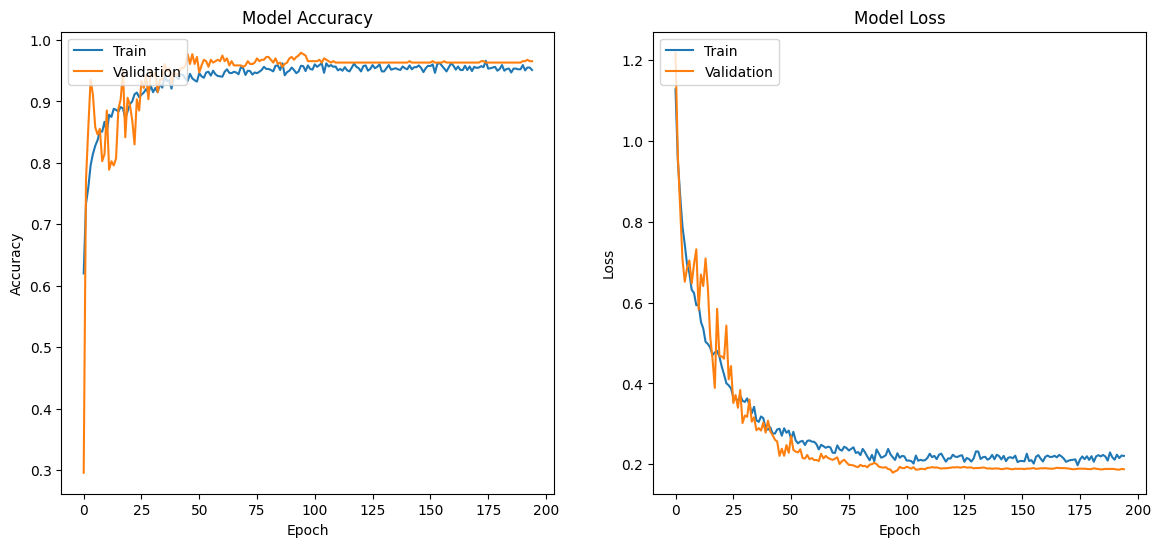

In [12]:
# Compile the model with Adam optimizer and learning rate schedule
optimizer = Adam(learning_rate=0.001)
model_2_layers.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model with class weights and callbacks
history = model_2_layers.fit(
    X_train_resampled, y_train_resampled, 
    epochs=300, batch_size=32, 
    validation_split=0.2, 
    verbose=1, 
    class_weight=class_weights_dict,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model on the test set
y_pred_probs = model_2_layers.predict(X_test_processed)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Calculate specificity (1 - false positive rate)
specificity = 1 - fpr

# Calculate geometric mean for each threshold
gmeans = np.sqrt(tpr * specificity)

# Find the optimal threshold
optimal_idx = np.argmax(gmeans)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold based on Geometric Mean: {optimal_threshold}")

# Make predictions based on the optimal threshold
y_pred = (y_pred_probs >= optimal_threshold).astype(int)

# Evaluate the new predictions
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot the ROC curve with the optimal point marked
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label='ROC curve')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## 3 layer

In [14]:
model_3_layers = Sequential([
    Dense(512, input_dim=X_train_resampled.shape[1], kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.4),

    Dense(256, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.4),

    Dense(128, activation='tanh', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='sigmoid')  # Output layer for binary classification
])


Epoch 1/300
55/55 [==============================] - 16s 38ms/step - loss: 1.3978 - accuracy: 0.5904 - val_loss: 1.4969 - val_accuracy: 0.0688 - lr: 0.0010
Epoch 2/300
55/55 [==============================] - 1s 26ms/step - loss: 1.2337 - accuracy: 0.6540 - val_loss: 1.2889 - val_accuracy: 0.4794 - lr: 0.0010
Epoch 3/300
55/55 [==============================] - 1s 25ms/step - loss: 1.1502 - accuracy: 0.7281 - val_loss: 1.1539 - val_accuracy: 0.7339 - lr: 0.0010
Epoch 4/300
55/55 [==============================] - 1s 15ms/step - loss: 1.0752 - accuracy: 0.7579 - val_loss: 1.0318 - val_accuracy: 0.7959 - lr: 0.0010
Epoch 5/300
55/55 [==============================] - 1s 19ms/step - loss: 1.0062 - accuracy: 0.7762 - val_loss: 1.0536 - val_accuracy: 0.6904 - lr: 0.0010
Epoch 6/300
55/55 [==============================] - 1s 22ms/step - loss: 0.9557 - accuracy: 0.7986 - val_loss: 0.9875 - val_accuracy: 0.7661 - lr: 0.0010
Epoch 7/300
55/55 [==============================] - 1s 23ms/step - l

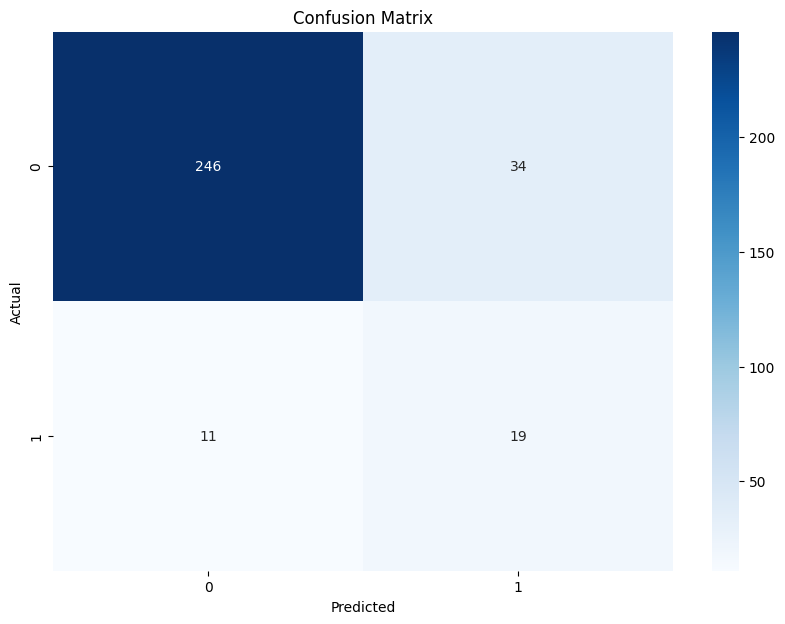

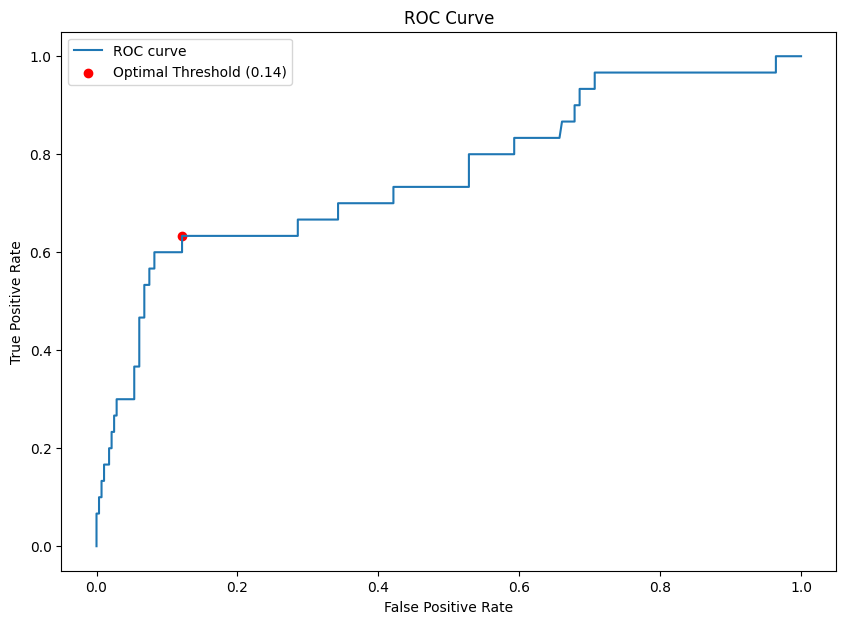

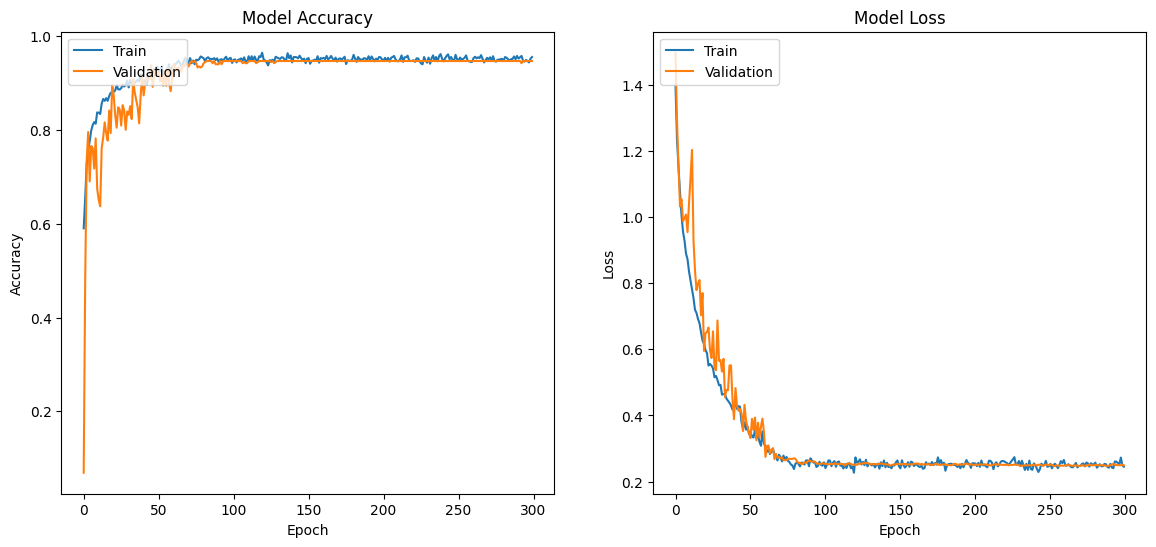

In [15]:
# Compile the model with Adam optimizer and learning rate schedule
optimizer = Adam(learning_rate=0.001)
model_3_layers.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model with class weights and callbacks
history = model_3_layers.fit(
    X_train_resampled, y_train_resampled, 
    epochs=300, batch_size=32, 
    validation_split=0.2, 
    verbose=1, 
    class_weight=class_weights_dict,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model on the test set
y_pred_probs = model_3_layers.predict(X_test_processed)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Calculate specificity (1 - false positive rate)
specificity = 1 - fpr

# Calculate geometric mean for each threshold
gmeans = np.sqrt(tpr * specificity)

# Find the optimal threshold
optimal_idx = np.argmax(gmeans)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold based on Geometric Mean: {optimal_threshold}")

# Make predictions based on the optimal threshold
y_pred = (y_pred_probs >= optimal_threshold).astype(int)

# Evaluate the new predictions
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot the ROC curve with the optimal point marked
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label='ROC curve')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## 4 layer

In [16]:
model_4_layers = Sequential([
    Dense(512, input_dim=X_train_resampled.shape[1], kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.4),

    Dense(256, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.4),

    Dense(128, activation='tanh', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1, activation='sigmoid')  # Output layer for binary classification
])


Epoch 1/300
55/55 [==============================] - 12s 39ms/step - loss: 1.4904 - accuracy: 0.5657 - val_loss: 1.4619 - val_accuracy: 0.2569 - lr: 0.0010
Epoch 2/300
55/55 [==============================] - 1s 25ms/step - loss: 1.3639 - accuracy: 0.6345 - val_loss: 1.3756 - val_accuracy: 0.5459 - lr: 0.0010
Epoch 3/300
55/55 [==============================] - 1s 26ms/step - loss: 1.3088 - accuracy: 0.6558 - val_loss: 1.3225 - val_accuracy: 0.5826 - lr: 0.0010
Epoch 4/300
55/55 [==============================] - 4s 66ms/step - loss: 1.2425 - accuracy: 0.7080 - val_loss: 1.2104 - val_accuracy: 0.7018 - lr: 0.0010
Epoch 5/300
55/55 [==============================] - 3s 50ms/step - loss: 1.1663 - accuracy: 0.7470 - val_loss: 1.1839 - val_accuracy: 0.7064 - lr: 0.0010
Epoch 6/300
55/55 [==============================] - 1s 16ms/step - loss: 1.1389 - accuracy: 0.7585 - val_loss: 1.1328 - val_accuracy: 0.7706 - lr: 0.0010
Epoch 7/300
55/55 [==============================] - 1s 22ms/step - l

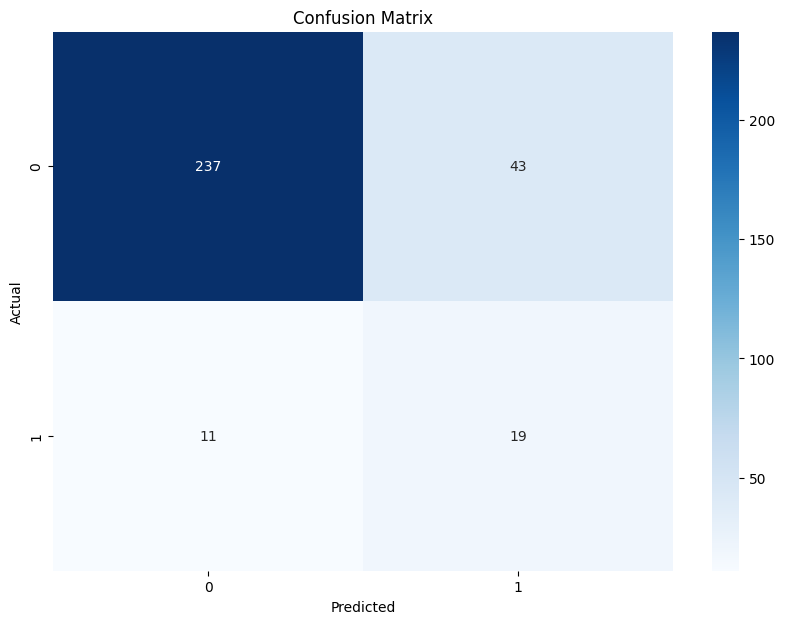

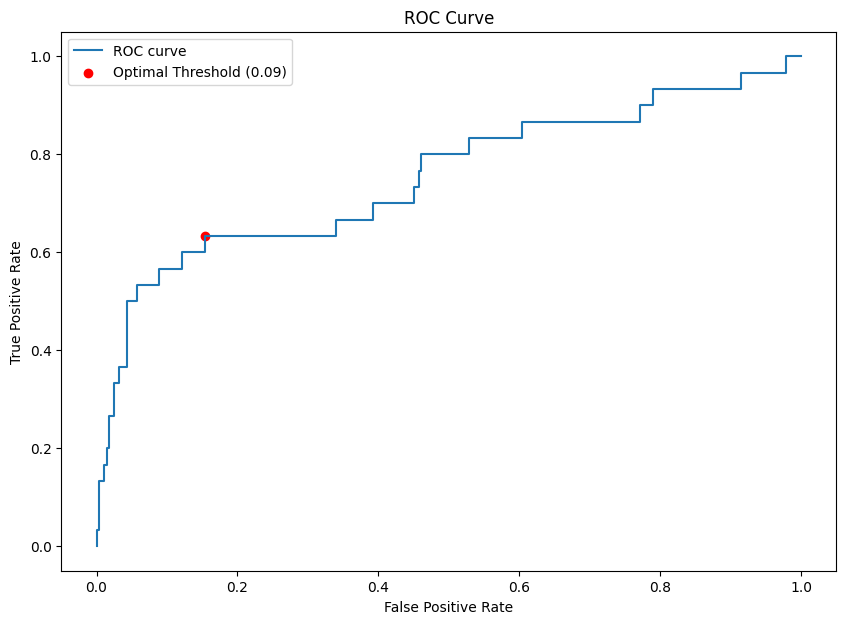

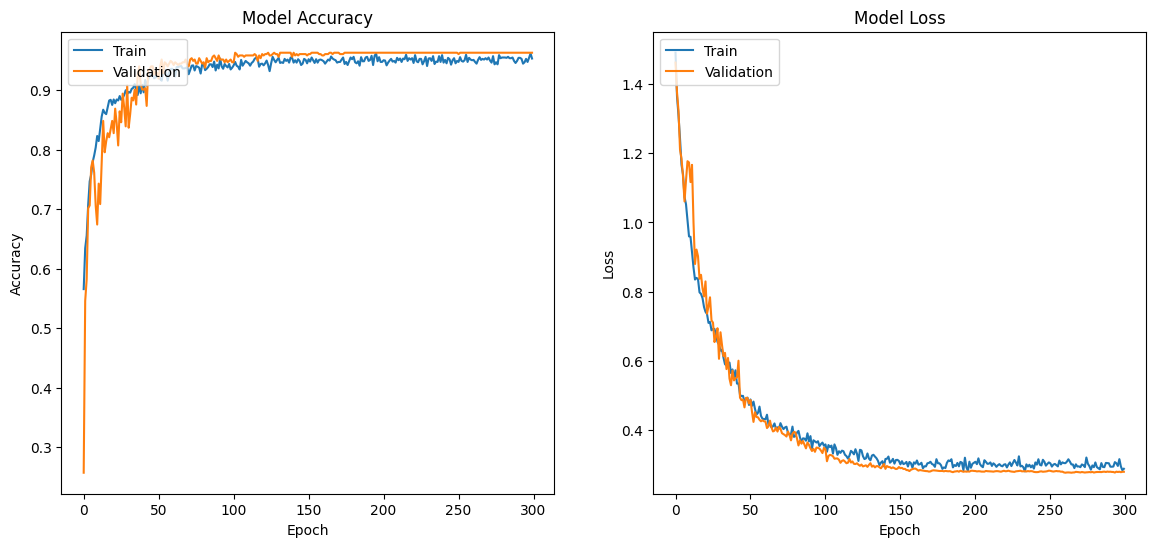

In [17]:
# Compile the model with Adam optimizer and learning rate schedule
optimizer = Adam(learning_rate=0.001)
model_4_layers.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model with class weights and callbacks
history = model_4_layers.fit(
    X_train_resampled, y_train_resampled, 
    epochs=300, batch_size=32, 
    validation_split=0.2, 
    verbose=1, 
    class_weight=class_weights_dict,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model on the test set
y_pred_probs = model_4_layers.predict(X_test_processed)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Calculate specificity (1 - false positive rate)
specificity = 1 - fpr

# Calculate geometric mean for each threshold
gmeans = np.sqrt(tpr * specificity)

# Find the optimal threshold
optimal_idx = np.argmax(gmeans)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold based on Geometric Mean: {optimal_threshold}")

# Make predictions based on the optimal threshold
y_pred = (y_pred_probs >= optimal_threshold).astype(int)

# Evaluate the new predictions
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot the ROC curve with the optimal point marked
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label='ROC curve')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## layer 5

Epoch 1/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.5927 - loss: 0.6812 - val_accuracy: 0.0000e+00 - val_loss: 0.9616
Epoch 2/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6158 - loss: 0.6500 - val_accuracy: 0.0505 - val_loss: 0.8694
Epoch 3/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6280 - loss: 0.6351 - val_accuracy: 0.0138 - val_loss: 0.8691
Epoch 4/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6113 - loss: 0.6220 - val_accuracy: 0.2087 - val_loss: 0.8947
Epoch 5/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7143 - loss: 0.5400 - val_accuracy: 0.6697 - val_loss: 0.6869
Epoch 6/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7816 - loss: 0.4638 - val_accuracy: 0.6697 - val_loss: 0.7078
Epoch 7/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8122 - loss: 0.4266 - val_accuracy: 0.6583 - val_loss: 0.7304
Epoch 8/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8490 - loss: 0.3629 - val_accuracy: 0.75

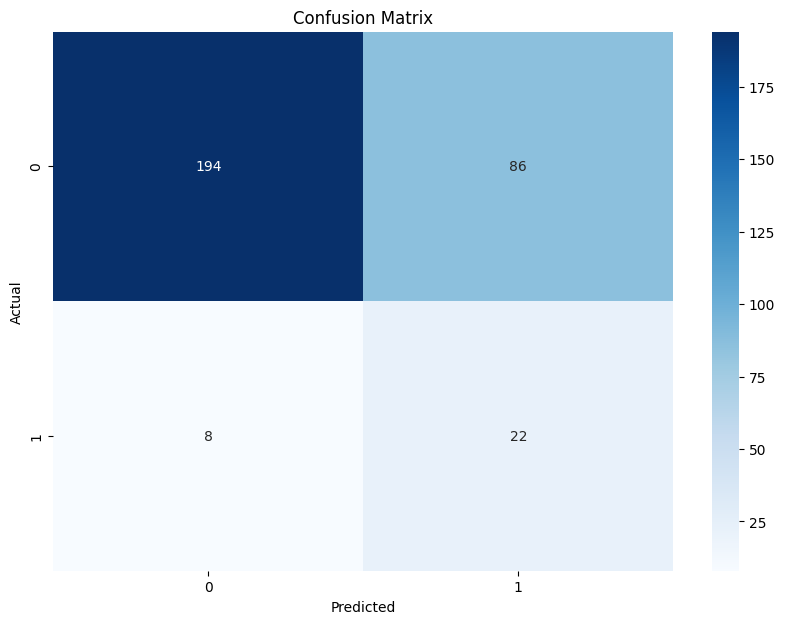

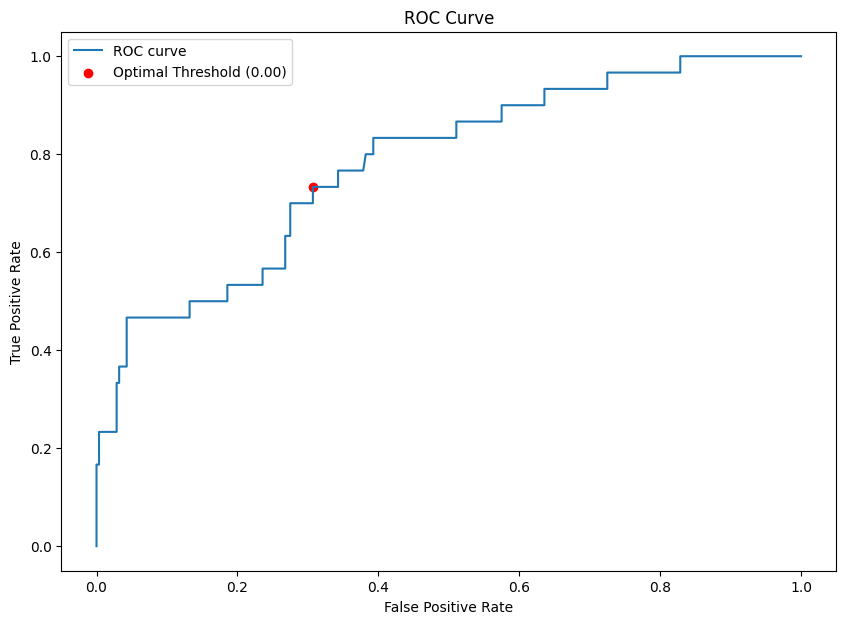

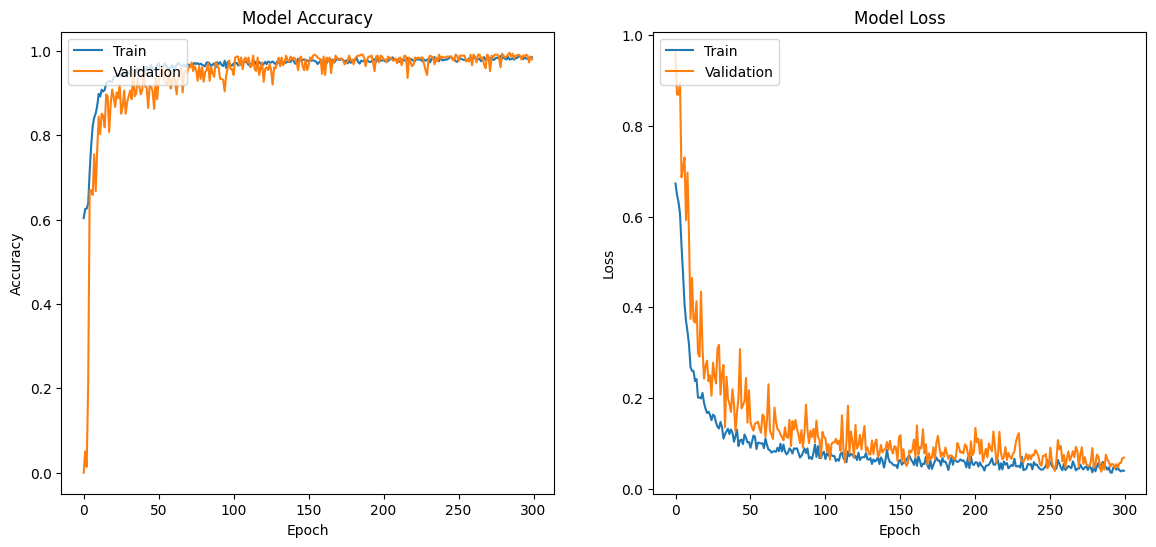

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU

# Define the neural network model with more layers and varied activation functions
model = Sequential([
    Dense(256, input_dim=X_train_resampled.shape[1]),  # First layer
    LeakyReLU(alpha=0.1),  # LeakyReLU activation function
    Dropout(0.3),
    
    Dense(128),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),
    
    Dense(64, activation='tanh'),  # Tanh activation function
    Dropout(0.3),
    
    Dense(32, activation='relu'),  # ReLU activation function
    Dropout(0.2),
    
    Dense(16, activation='relu'),
    Dropout(0.2),
    
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with class weights
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with class weights
history = model.fit(X_train_resampled, y_train_resampled, epochs=300, batch_size=32, validation_split=0.2, verbose=1, class_weight=class_weights_dict)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_processed)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Calculate specificity (1 - false positive rate)
specificity = 1 - fpr

# Calculate geometric mean for each threshold
gmeans = np.sqrt(tpr * specificity)

# Find the optimal threshold
optimal_idx = np.argmax(gmeans)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold based on Geometric Mean: {optimal_threshold}")

# Make predictions based on the optimal threshold
y_pred = (y_pred_probs >= optimal_threshold).astype(int)

# Evaluate the new predictions
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot the ROC curve with the optimal point marked
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label='ROC curve')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Epoch 1/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.4790 - loss: 1.6871 - val_accuracy: 0.5115 - val_loss: 1.4632 - learning_rate: 0.0010
Epoch 2/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5161 - loss: 1.5885 - val_accuracy: 0.2821 - val_loss: 1.5000 - learning_rate: 0.0010
Epoch 3/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5347 - loss: 1.4988 - val_accuracy: 0.2225 - val_loss: 1.5227 - learning_rate: 0.0010
Epoch 4/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5636 - loss: 1.4718 - val_accuracy: 0.1124 - val_loss: 1.5678 - learning_rate: 0.0010
Epoch 5/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6025 - loss: 1.4613 - val_accuracy: 0.1193 - val_loss: 1.5859 - learning_rate: 0.0010
Epoch 6/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5716 - loss: 1.4715 - val_accuracy: 0.0872 - val_loss: 1.5999 - learning_rate: 0.0010
Epoch 7/300
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5655 - loss: 1.4414 -

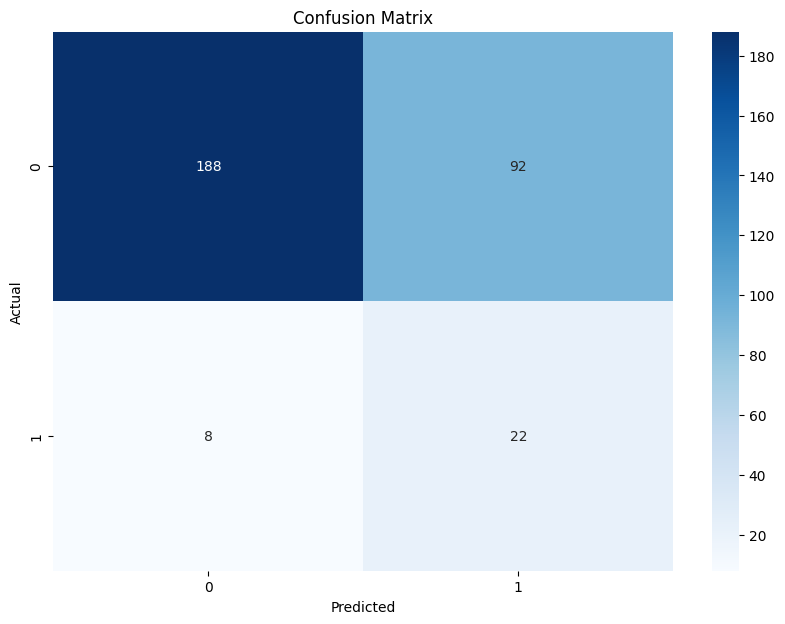

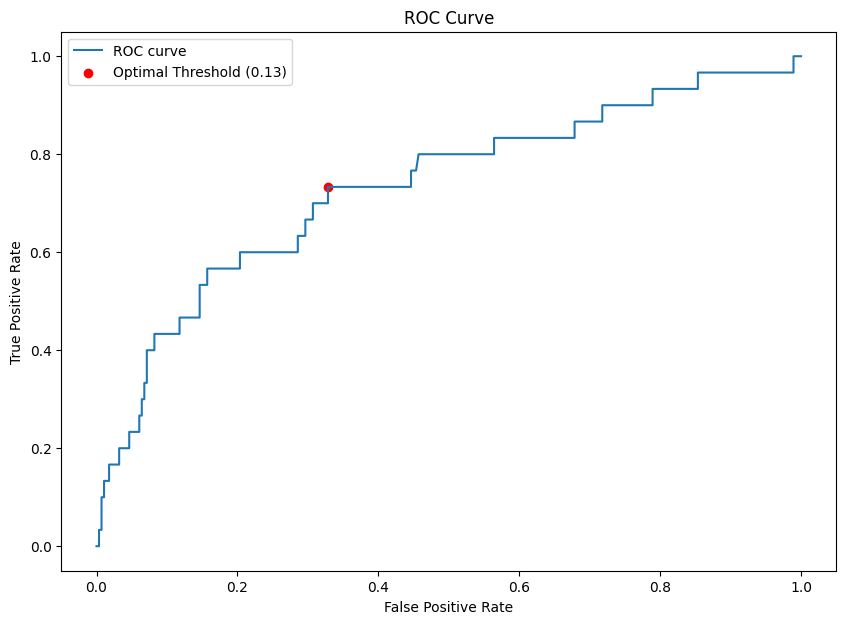

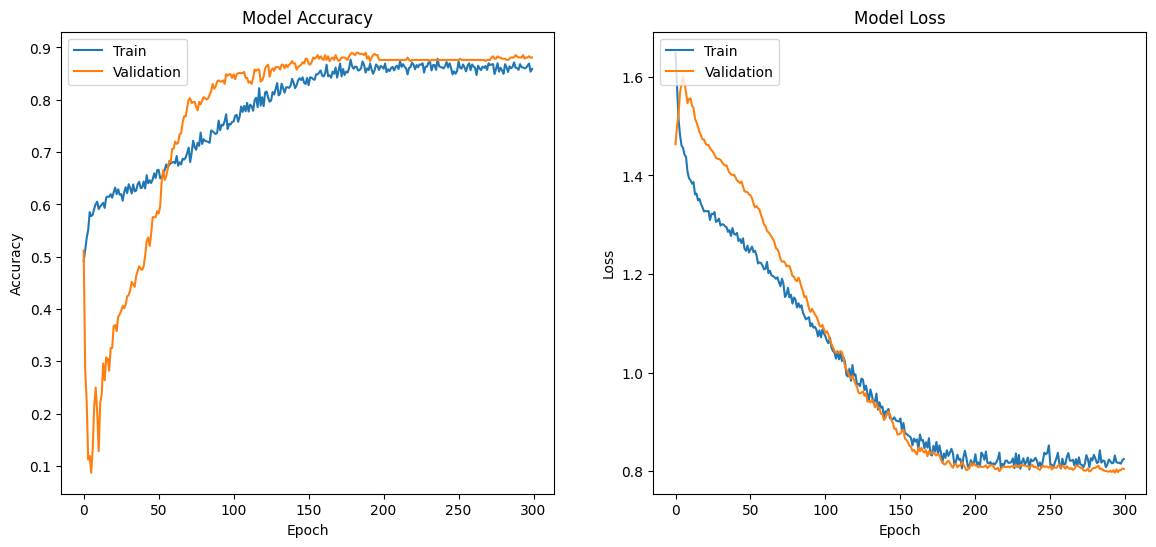

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Define the neural network model with optimizations
model = Sequential([
    Dense(512, input_dim=X_train_resampled.shape[1], kernel_regularizer=l2(0.001)),  # L2 regularization
    BatchNormalization(),  # Batch Normalization
    LeakyReLU(alpha=0.1),
    Dropout(0.4),

    Dense(256, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.4),

    Dense(128, activation='tanh', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(8, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with Adam optimizer and learning rate schedule
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model with class weights and callbacks
history = model.fit(
    X_train_resampled, y_train_resampled, 
    epochs=300, batch_size=32, 
    validation_split=0.2, 
    verbose=1, 
    class_weight=class_weights_dict,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_processed)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Calculate specificity (1 - false positive rate)
specificity = 1 - fpr

# Calculate geometric mean for each threshold
gmeans = np.sqrt(tpr * specificity)

# Find the optimal threshold
optimal_idx = np.argmax(gmeans)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold based on Geometric Mean: {optimal_threshold}")

# Make predictions based on the optimal threshold
y_pred = (y_pred_probs >= optimal_threshold).astype(int)

# Evaluate the new predictions
print("Classification Report:")
print(classification_report(y_test, y_pred,digits=3))

# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot the ROC curve with the optimal point marked
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label='ROC curve')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label=f'Optimal Threshold ({optimal_threshold:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
